<a href="https://colab.research.google.com/github/lehoangkhanh-17520623/CS114.L11.KHCL/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lấy dữ liệu:

In [53]:
!wget http://cs.uit.edu.vn/data.txt

--2020-11-15 15:11:23--  http://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt.5’

data.txt.5          100%[===================>]  82.43K   184KB/s    in 0.4s    

2020-11-15 15:11:25 (184 KB/s) - ‘data.txt.5’ saved [84410/84410]



import thư viện:

In [77]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# file data.txt
data = pd.read_csv('data.txt',header=None)
X  = data[0]
Y  = data[1]
data.describe()

,0,1
count,5.211000e+03,5211.000000
mean,4.991583e+06,1.363322
std,2.903517e+06,0.825849
min,2.390000e+02,0.000028
25%,2.451362e+06,0.630964
50%,5.032102e+06,1.355770
75%,7.523041e+06,2.076820
max,9.995358e+06,3.315540


In [57]:

# Split the data into training/testing sets
X_train = np.array(X[:-1000])
X_test = np.array(X[-1000:])

# Split the targets into training/testing sets
Y_train = np.array(Y[:-1000])
Y_test = np.array(Y[-1000:])

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
X_test = X_test.reshape(-1,1)

Vẽ biểu đồ trực quan hóa mối liên hệ giữa diện tích nhà và giá:

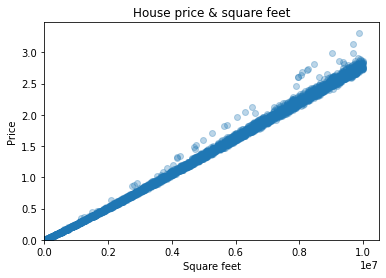

In [66]:
plt.scatter(X_train, Y_train, alpha = 0.3)
plt.title('House price & square feet')
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [65]:
# Create linear regression object
regression = LinearRegression()

# Train the model using the training sets
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Giá trị hệ số góc:

In [59]:
regression.coef_ # theta_1

array([[2.84130124e-07]])

Điểm cắt trục y:

In [60]:
regression.intercept_ # theta_0

array([-0.0541655])

Vẽ đường thẳng Linear Regression trên tập dữ liệu training:

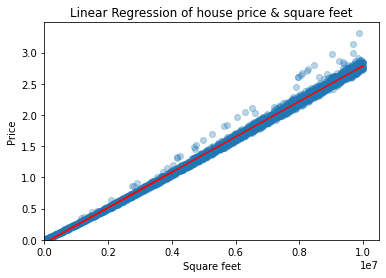

In [81]:
plt.scatter(X_train, Y_train, alpha = 0.3)
plt.plot(X_train, regression.predict(X_train), color='red')

plt.title('Linear Regression of house price & square feet')
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

Vẽ đường thẳng Linear Regression trên tập dữ liệu test:

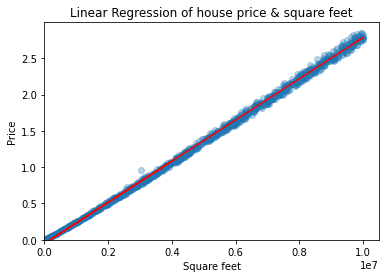

In [80]:
plt.scatter(X_test, Y_test, alpha = 0.3)
plt.plot(X_train, regression.predict(X_train), color='red')

plt.title('Linear Regression of house price & square feet')
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

Goodness of fit:

In [73]:
regression.score(X_test,Y_test)

0.9983913305331106

Độ lỗi:

In [86]:
mean_squared_error(Y_test, regression.predict(X_test))

0.0010644228869562057